**Was there a Baby Boom During Covid in the UK?**

The paper 'Boom or Baby Bust After the COVID-19 Onset in the United States?' (Shichao Du and Chin-Han Chan, 2023), questions if there was an increase in fertility during COVID in the United States.

Another paper, 'Potential Effects of the COVID-19 Pandemic on Future Birth Rate' (Md. Asad Ullah et al, 2020) takes a different approach and investigates the social and mental health effects caused by the pandemic on fertility. The question being asked was if there was a reduction in fertility due to the pandemic.

Did COVID also affect birth rates in the UK? Birth rates in the UK has been steadly declining. According to the Office of National Statitics (Office for National Statistics (ONS), released 27 August 2025, ONS website, statistical bulletin, Births in England and Wales: 2024) the Total Fertility rate has been declining since 2010. This statistical analysis explores this question by analysing the UK (England and Wales) birth rates from 1995 - 2022.

The ONS dataset excludes the 29th of February for leap years - which means February births for leap years are undercounted.

The Codebook is saved here https://github.com/Truseven/Everything-Counts.git

In [79]:
import numpy as np
import pandas as pd
import io
import requests

# load data
data_file = 'births-by-date.csv'
df= pd. read_csv (data_file)

# view data
df

,Date,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,01/01,1366.0,1346.0,1469.0,1408.0,1527.0,1561.0,1653.0,1686.0,1602.0,...,1465.0,1454.0,1361.0,1337.0,1496.0,1530.0,1586.0,1657.0,1505.0,1529.0
1,02/01,1383.0,1310.0,1812.0,1853.0,1829.0,1524.0,1648.0,1889.0,2018.0,...,1765.0,1619.0,1519.0,1669.0,1382.0,1503.0,1817.0,1809.0,1767.0,1425.0
2,03/01,1392.0,1319.0,1807.0,1903.0,1953.0,1944.0,1570.0,1667.0,2077.0,...,1565.0,1881.0,1784.0,1796.0,1526.0,1495.0,1651.0,2005.0,1825.0,1703.0
3,04/01,1755.0,1574.0,1514.0,1898.0,1932.0,1924.0,2002.0,1636.0,1732.0,...,1473.0,1502.0,1776.0,1832.0,1818.0,1797.0,1561.0,1742.0,1913.0,1883.0
4,05/01,1749.0,1640.0,1473.0,1556.0,1932.0,1936.0,1982.0,1970.0,1621.0,...,1769.0,1372.0,1473.0,1838.0,1836.0,1859.0,1871.0,1462.0,1888.0,1890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,28/12,1770.0,1429.0,1290.0,1424.0,1922.0,1943.0,1951.0,1529.0,1519.0,...,1471.0,1452.0,1495.0,1779.0,1780.0,1522.0,1463.0,1565.0,1757.0,1897.0
362,29/12,1870.0,1958.0,1756.0,1456.0,1604.0,2025.0,2077.0,2066.0,1906.0,...,1908.0,1755.0,1426.0,1541.0,1782.0,1856.0,1819.0,1890.0,1633.0,1857.0
363,30/12,1798.0,1846.0,1720.0,1793.0,1572.0,1709.0,2034.0,2122.0,2006.0,...,1858.0,1809.0,1700.0,1439.0,1559.0,1912.0,1876.0,1918.0,1883.0,1661.0
364,31/12,1423.0,1801.0,1741.0,1837.0,1857.0,1565.0,1664.0,2094.0,1980.0,...,1937.0,1762.0,1780.0,1615.0,1377.0,1664.0,1855.0,1891.0,1844.0,1532.0


The dataset shows total daily births from 1995 to 2022. To form the null hypothesis, an exploratory analysis of the following years was carried out.

*   2019 - Pre-Covid,
*   2020 - Covid Year
*   2021 - Covid Births
*   2022 - Post Covid


For 2021 - Covid Births this assumes conceptions from when the lockdown started in March 2020 and ended into when March 2021 (Timeline lockdown - https://www.instituteforgovernment.org.uk/sites/default/files/timeline-lockdown-web.pdf).

There were phased lockdown relaxations, and a further second lockdown, 2020-2021 will be compared for the full 12 months for each year, for the initial exploratory analysis.

In [80]:
#These are variables for each of the years.
pre_covid = df['2019'].describe()
covid_year  = df['2020'].describe()
covid_births  = df['2021'].describe()
post_covid  = df['2022'].describe()

In [81]:
#This function will combine the statistics for 2019-2022 into one dataframe
combined_stats = pd.DataFrame({
    '2019': pre_covid,
    '2020': covid_year,
    '2021': covid_births,
    '2022': post_covid
})
display(combined_stats)

,2019,2020,2021,2022
count,365.000000,365.000000,365.000000,365.000000
mean,1754.438356,1677.978082,1711.857534,1658.846575
std,166.472136,164.671333,186.588080,182.472649
min,1219.000000,1076.000000,1139.000000,1123.000000
25%,1585.000000,1524.000000,1535.000000,1443.000000
50%,1808.000000,1743.000000,1774.000000,1743.000000
75%,1874.000000,1802.000000,1851.000000,1796.000000
max,2064.000000,1962.000000,2055.000000,1944.000000


By comparing annual mean births for the years 2019-2022, we observe that there was a decline in births from 1754 in 2019 to 1678 in 2020. There was a slight increase in 2021 to 1712 births. In 2022, the births declined to 1659, which was even lower than the 2020 births.

H0 = There was no impact on births during COVID-19 lockdown

HA = There was a decrease in births during COVID-19 lockdown.

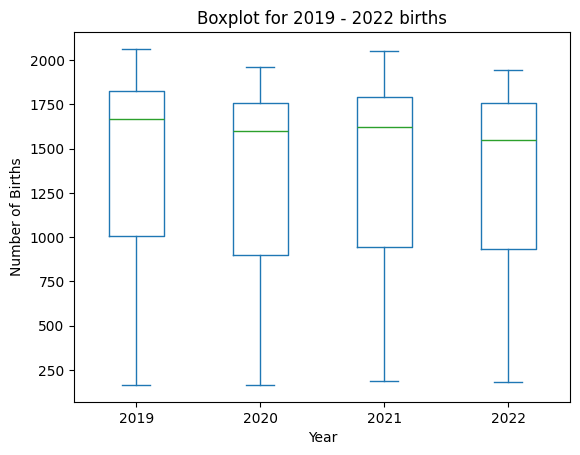

In [82]:
# This will plot a box-plot of the distribution of the 2019-2022 statistics. This allows us to see the differences in means at a glance.

import matplotlib.pyplot as plt

combined_stats.plot(kind='box', title='Boxplot for 2019 - 2022 births')

# Add the labels
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

In [88]:

# Convert Date column to datetime (day/month format)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m')

# This simplifies the dataframe from a wide columns (years as columns) to a long format with only 3 columns, the index, Full Date and Births.
df_long = df.melt(
    id_vars='Date',
    var_name='Year',
    value_name='Births'
)

df_long['Year'] = df_long['Year'].astype(int)

# This changes the format of the date to a full date eg 1995-01-31.
df_long['FullDate'] = pd.to_datetime(
    df_long['Year'].astype(str) + '-' + df_long['Date'].dt.strftime('%m-%d')
)

# Aggregates all the daily total births to monthly totals.
monthly = (
    df_long
    .groupby(pd.Grouper(key='FullDate', freq='ME'))['Births']
    .sum()
    .reset_index()
)

monthly.head()

,FullDate,Births
0,1995-01-31,53455.0
1,1995-02-28,49695.0
2,1995-03-31,55363.0
3,1995-04-30,52177.0
4,1995-05-31,56748.0


In [90]:
# Time index
monthly['t'] = range(len(monthly))

# COVID indicator (March 2020 onwards)
monthly['covid'] = (monthly['FullDate'] >= '2020-03-01').astype(int)

# Month fixed effects (controls seasonality)
monthly['month'] = monthly['FullDate'].dt.month

import statsmodels.formula.api as smf

model = smf.ols(
    formula="Births ~ t + covid + C(month)",
    data=monthly
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Births   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     29.66
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           1.74e-47
Time:                        13:16:30   Log-Likelihood:                -3136.7
No. Observations:                 336   AIC:                             6301.
Df Residuals:                     322   BIC:                             6355.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.168e+04    598.757     86.

There were 7093 (-7902.58) fewer births per month during COVID-19. The p-value is 0.00, which is less than the 0.05. There is therefore a statistically significant difference to reject the null hypothesis that COVID-19 had no impact on births in the UK. We can accept the alternative hypothesis that there was a significant decrease in births during COVID-19.

There are other negative coeffients in February (T.2) (-4895.92) which are statistically significant (p value is less than 0.05).This could be a result of February being a shorter month, or that leap years were not account for in the data. This will probably create bias in the data.

There are also statistically significant increases in births in July, August, September and October, which could point at seasonality. According to the ONS, "more babies are conceived in the weeks leading up to and days after Christmas than at any other time of the year." (ONS - https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/articles/howpopularisyourbirthday/2015-12-18)


AI Disclosure
Google Gemini was used to assist with the code to concentenate the daily births into monthly births, and reformatting the dataset to allow for easier data manipulation.
